<a href="https://colab.research.google.com/github/hjoddi/REI201G-python-projects/blob/main/T8_HjorvarSigurdsson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stærðfræði og reiknifræði vor 2022, tímadæmi 8

In [ ]:
#BYRJA
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import pandas as pd

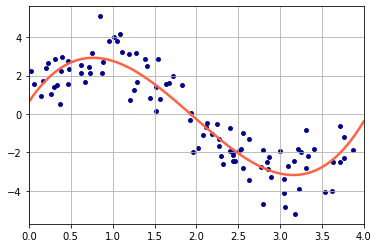

In [ ]:
# Fyrri æfingin í kafla 13.6 (besta 3. stigs fall)

## Gögnin
rng = np.random.default_rng()
n = 100
x = rng.uniform(0, 4, size=n)
yp = x*(x-2)*(x-4)
delta = rng.normal(0, 1, size=n)
y = yp + delta

## Teikning
def plottapunkta(x,y,k):
  plt.scatter(x, y, s=15, c='darkblue')
  plt.xlim(0,4)
  plt.grid()

plottapunkta(x,y,1)

## Ferill
(a,b,c,d) = np.polyfit(x, y, deg=3)
X = np.linspace(0,4,100)
Y = a*X**3 + b*X**2 + c*X + d
plt.plot(X, Y, color='tomato', lw=2.5)


In [ ]:
# Seinni fingin í kafla 13.6 (besta plan)

import statsmodels.api as sm

skrá = 'https://cs.hi.is/python/karfa.txt'
A = np.loadtxt(skrá)
(aldur, hæð, þyngd) = np.loadtxt(skrá).T

X = np.array([aldur, þyngd]).T
X = sm.add_constant(X)
model = sm.OLS(hæð, X)
result = model.fit()
(a,b,c) = result.params

print(f"Módelið er: hæð = {a:.3f} + {b:.3f}*aldur + {c:.3f}*þyngd")
print()
print(result.summary())

Módelið er: hæð = 162.742 + -0.235*aldur + 0.341*þyngd

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     151.6
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.27e-58
Time:                        02:57:35   Log-Likelihood:                -3427.5
No. Observations:                1064   AIC:                             6861.
Df Residuals:                    1061   BIC:                             6876.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
# Pandas prófað á ýmsum skrám

df1 = pd.read_fwf('https://cs.hi.is/python/ord.txt')
df2 = pd.read_fwf('https://cs.hi.is/python/karfa.txt', names=["Aldur", "Hæð", "Þyngd"])
df2.describe()
df3 = pd.read_csv('https://cs.hi.is/python/karfa.txt', delim_whitespace=True, names=["Aldur", "Hæð", "Þyngd"])
df3.describe()
df3.sort_values(by="Þyngd")
A = np.array(df3.loc[:, "Aldur":"Þyngd"])
print(A)

df4 = pd.read_csv('https://cs.hi.is/python/evropulond.txt', names=["Land_ISL", "Land_EN", "Landskóði", "Íbúafjöldi í landi"], index_col=2)
df5 = pd.read_csv('https://cs.hi.is/python/hofudborgir.txt', names=["Landskóði", "Höfuðborg", "Íbúafjöldi í höfuðborg"], index_col=0)
df6 = df4.join(df5)
display(df6)
df6["Hlutf"] = df6['Íbúafjöldi í höfuðborg'] / df6['Íbúafjöldi í landi']
display(df6)

[[ 22.99 184.2   80.9 ]
 [ 34.69 187.8   98.1 ]
 [ 30.78 178.3   95.5 ]
 ...
 [ 25.19 195.6   93.1 ]
 [ 31.01 194.1   86.3 ]
 [ 27.92 191.    88.5 ]]


,Land_ISL,Land_EN,Íbúafjöldi í landi,Höfuðborg,Íbúafjöldi í höfuðborg
Landskóði,,,,,
AL,Albanía,Albania,2829741,Tírana,557000
AD,Andorra,Andorra,78015,Andorra la Vella,23000
AM,Armenía,Armenia,2956900,Jerevan,1084000
AZ,Aserbaídsjan,Azerbaijan,10139196,Bakú,2236000
AT,Austurríki,Austria,8976467,Vín,1897500
BE,Belgía,Belgium,11521238,Brussel,1200000
BA,Bosnía og Hersegóvína,Bosnia and Herzegovina,3511372,Sarajevó,280000
GB,Bretland,United Kingdom,67081234,London,8900000
BG,Búlgaría,Bulgaria,6916548,Sófía,1241000


,Land_ISL,Land_EN,Íbúafjöldi í landi,Höfuðborg,Íbúafjöldi í höfuðborg,Hlutf
Landskóði,,,,,,
AL,Albanía,Albania,2829741,Tírana,557000,0.196838
AD,Andorra,Andorra,78015,Andorra la Vella,23000,0.294815
AM,Armenía,Armenia,2956900,Jerevan,1084000,0.366600
AZ,Aserbaídsjan,Azerbaijan,10139196,Bakú,2236000,0.220530
AT,Austurríki,Austria,8976467,Vín,1897500,0.211386
BE,Belgía,Belgium,11521238,Brussel,1200000,0.104155
BA,Bosnía og Hersegóvína,Bosnia and Herzegovina,3511372,Sarajevó,280000,0.079741
GB,Bretland,United Kingdom,67081234,London,8900000,0.132675
BG,Búlgaría,Bulgaria,6916548,Sófía,1241000,0.179425


In [ ]:
# Verkefni 12 með Pandas

df_eink = pd.read_csv('https://cs.hi.is/python/einkunn.txt', delim_whitespace=True, names=["Prófnúmer", "Einkunn"], index_col=0)
df_nofn = pd.read_csv('https://cs.hi.is/python/nofn.txt', sep="  ", names=["Prófnúmer", "Nafn"], index_col=0)
df = df_eink.join(df_nofn)
display(df)

for x in range(0, len(df['Einkunn'])):
  print(df.iloc[x])
  print()

df = df.sort_values(by="Einkunn", ascending=False)
print(df)
print()
haestNafn = df['Nafn'].values[0]
haestEinkunn = df['Einkunn'].values[0]
print(f"{haestNafn} var hæst með {haestEinkunn}.")

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Einkunn,Nafn
Prófnúmer,,
176,7.0,Sigrún Ása Jónsdóttir
542,8.0,Kristín Fjóludóttir
970,9.5,Birta Lárusdóttir
1419,6.5,Erla Ýr Guðnadóttir
1577,7.0,Hulda Ósk Jónasdóttir
2785,9.0,Bjarki Már Sveinsson
4218,7.0,Kjartan Valur Jónsson
4854,9.0,Anton Ingi Þórsson
5469,10.0,Íris María Birgisdóttir


Einkunn                      7.0
Nafn       Sigrún Ása Jónsdóttir
Name: 176, dtype: object

Einkunn                    8.0
Nafn       Kristín Fjóludóttir
Name: 542, dtype: object

Einkunn                  9.5
Nafn       Birta Lárusdóttir
Name: 970, dtype: object

Einkunn                    6.5
Nafn       Erla Ýr Guðnadóttir
Name: 1419, dtype: object

Einkunn                      7.0
Nafn       Hulda Ósk Jónasdóttir
Name: 1577, dtype: object

Einkunn                     9.0
Nafn       Bjarki Már Sveinsson
Name: 2785, dtype: object

Einkunn                      7.0
Nafn       Kjartan Valur Jónsson
Name: 4218, dtype: object

Einkunn                   9.0
Nafn       Anton Ingi Þórsson
Name: 4854, dtype: object

Einkunn                       10.0
Nafn       Íris María Birgisdóttir
Name: 5469, dtype: object

Einkunn                6.5
Nafn       Ívar Sigurðsson
Name: 6324, dtype: object

Einkunn                    8.5
Nafn       Ágúst Guðni Ingason
Name: 6558, dtype: object

Einkunn         